In [1]:
# Documents filter performance
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
hp_filt = np.load('./hp_iir_filter.npz')
lp_filt = np.load('./lp_fir_filter.npz')

In [56]:
# Looks at the HP IIR Filter
num = hp_filt['ba'][0]
den = hp_filt['ba'][1]
print(num)
print(den)

[ 0.99835013 -1.99670027  0.99835013]
[ 1.         -1.99692777  0.99693255]


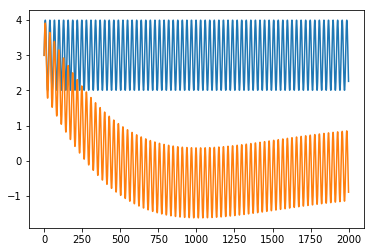

In [58]:
# Tests
sine = np.sin(np.arange(0, 2000)*2*np.pi/30) + 3
sine_filt = signal.lfilter(num, den, sine)
plt.plot(sine)
plt.plot(sine_filt)

In [63]:
n_store = [0, 0]
d_store = [0, 0]
def iir_filt(b, a, signal):
    y = b[0]*signal + b[1]*n_store[0] + b[2]*n_store[1] - a[1] * d_store[0] - a[2] *d_store[1]
    n_store[1] = n_store[0]
    n_store[0] = signal
    d_store[1] = d_store[0]
    d_store[0] = y
    return y
sine_filt_manual = []
for ii in range(len(sine)):
    sine_filt_manual += [iir_filt(num, den, sine[ii])]

In [64]:
print(num)
print(den)

[ 0.99835013 -1.99670027  0.99835013]
[ 1.         -1.99692777  0.99693255]


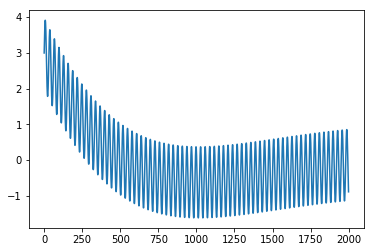

In [65]:
plt.plot(sine_filt_manual)

In [78]:
# Quantizes LP filter
scale = 2**20
lp_scaled = []
lp_num = lp_filt['ba'][0]
for n in lp_num:
    lp_scaled += [int(np.round(n*scale))]

for n in lp_scaled:
    print('{:d},'.format(n))


5,
119,
141,
101,
-13,
-112,
-97,
30,
149,
124,
-46,
-199,
-161,
65,
262,
204,
-90,
-338,
-254,
125,
430,
310,
-171,
-539,
-372,
230,
669,
437,
-307,
-820,
-507,
403,
995,
578,
-523,
-1195,
-650,
671,
1424,
719,
-852,
-1683,
-783,
1070,
1973,
839,
-1331,
-2298,
-883,
1641,
2659,
909,
-2007,
-3058,
-913,
2438,
3499,
889,
-2944,
-3984,
-828,
3535,
4517,
722,
-4227,
-5105,
-561,
5037,
5753,
330,
-5990,
-6474,
-13,
7118,
7283,
-414,
-8468,
-8203,
983,
10106,
9269,
-1741,
-12136,
-10541,
2762,
14727,
12115,
-4168,
-18169,
-14167,
6181,
23012,
17044,
-9253,
-30440,
-21538,
14476,
43531,
29904,
-25316,
-73585,
-52149,
61887,
222318,
338453,
338453,
222318,
61887,
-52149,
-73585,
-25316,
29904,
43531,
14476,
-21538,
-30440,
-9253,
17044,
23012,
6181,
-14167,
-18169,
-4168,
12115,
14727,
2762,
-10541,
-12136,
-1741,
9269,
10106,
983,
-8203,
-8468,
-414,
7283,
7118,
-13,
-6474,
-5990,
330,
5753,
5037,
-561,
-5105,
-4227,
722,
4517,
3535,
-828,
-3984,
-2944,
889,
3499,
2438,
-913,
-3058,
-2007,
9